In [3]:
# Section 1 - Loading our Libraries
import os
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# Set directory where files are located.
directory = '/Users/milko/Local/Data/Disease/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
# Remember to close the path with a slash!
if directory[-1] != '/':
    directory += '/'
# Set the column mappings.
columns_map = {
    'Country/Region': 'Country'
}
# Load all data.
df = pd.DataFrame()
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
for file in glob.glob(directory + "*.csv"):
    
    # Extract date.
    month, day, year = os.path.basename(file)[:10].split('-')
    date = datetime.datetime(int(year), int(month), int(day))
    
    # Load report.
    report = pd.read_csv(file)
    
    # Normalise columns.
    report.rename(columns={ 'Country/Region': 'Country' }, inplace=True)
    
    # Add date.
    report['Date'] = date
    
    # Set computed active cases
    report['Current'] = report['Confirmed'] - (report['Recovered'] + report['Deaths'])
    
    # Keep significant columns
    report.
    
    # Append to data frame.
    df = df.append(report, sort=False)

df = df[['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']]
df = df[df['Country'].isin(countries)]
df.fillna(value=0)
df.to_csv('test1.csv')
df.info()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [4]:
# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]
df.to_csv('test2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 32 to 14527
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       474 non-null    datetime64[ns]
 1   Country    474 non-null    object        
 2   Confirmed  474 non-null    int64         
 3   Recovered  474 non-null    int64         
 4   Deaths     474 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 22.2+ KB


In [35]:
print(df['Date'].min())
print(df['Date'].max())

2020-01-22 00:00:00
2020-04-09 00:00:00


In [39]:
# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 36 to 254
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2385 non-null   datetime64[ns]
 1   Country    2385 non-null   object        
 2   Confirmed  2385 non-null   float64       
 3   Recovered  2333 non-null   float64       
 4   Deaths     2333 non-null   float64       
 5   Cases      2385 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 130.4+ KB


In [38]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
df.head()

ValueError: Index contains duplicate entries, cannot reshape

In [23]:
countries = list(df.columns)
covid = df.reset_index('Date')
covid.head()

Country,Date,Canada,China,France,Germany,US,United Kingdom
0,2020-01-22,0,593,0,0,1,0
1,2020-01-23,0,691,0,0,1,0
2,2020-01-24,0,982,2,0,2,0
3,2020-01-25,0,1487,3,0,2,0
4,2020-01-26,1,2180,3,0,5,0


In [24]:
covid.set_index(['Date'], inplace=True)
covid.head()

Country,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,2,0,2,0
2020-01-25,0,1487,3,0,2,0
2020-01-26,1,2180,3,0,5,0


In [25]:
countries

['Canada', 'China', 'France', 'Germany', 'US', 'United Kingdom']

In [26]:
covid.columns = countries
covid.head()

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,2,0,2,0
2020-01-25,0,1487,3,0,2,0
2020-01-26,1,2180,3,0,5,0


In [27]:
# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
percapita.head()

,Canada,China,France,Germany,US,United Kingdom
Date,,,,,,
2020-01-22,0.000000,0.041237,0.000000,0.0,0.000303,0.0
2020-01-23,0.000000,0.048052,0.000000,0.0,0.000303,0.0
2020-01-24,0.000000,0.068288,0.003066,0.0,0.000605,0.0
2020-01-25,0.000000,0.103406,0.004598,0.0,0.000605,0.0
2020-01-26,0.002655,0.151597,0.004598,0.0,0.001513,0.0


Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

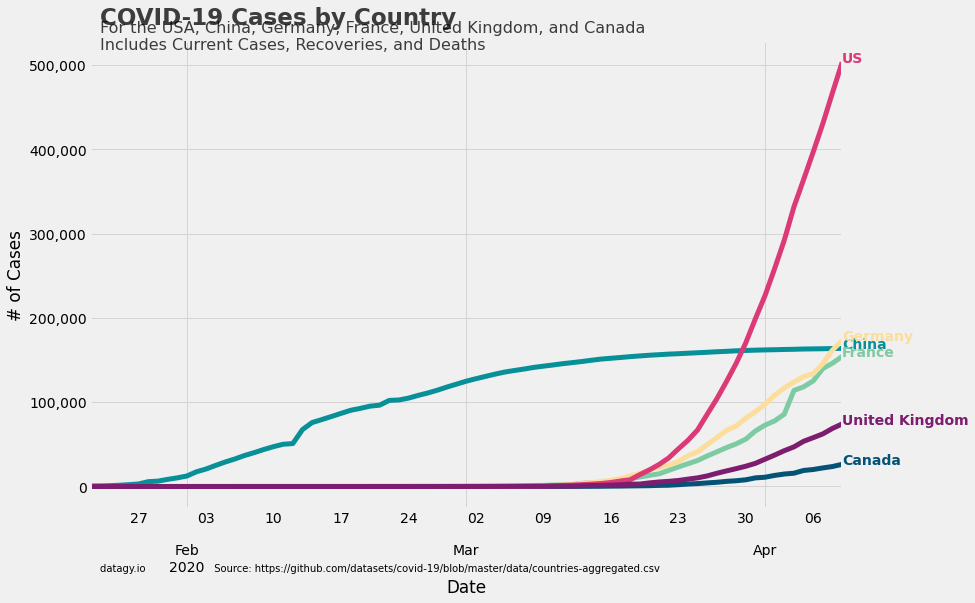

In [31]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

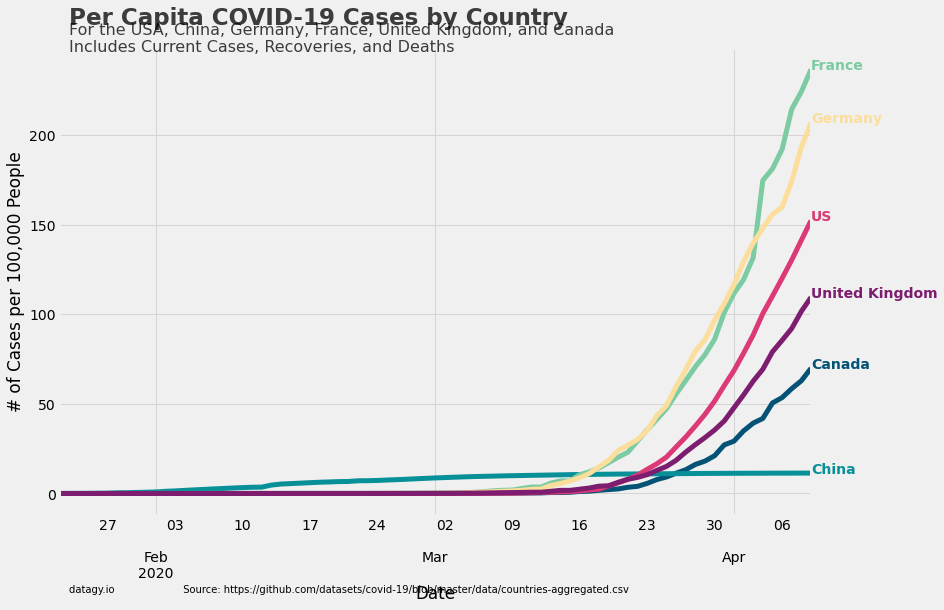

In [32]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)